In [1]:


import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

df=pd.read_csv("Fraud_check.csv")
df



,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [2]:


df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [3]:


df.corr()



,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


<Axes: >

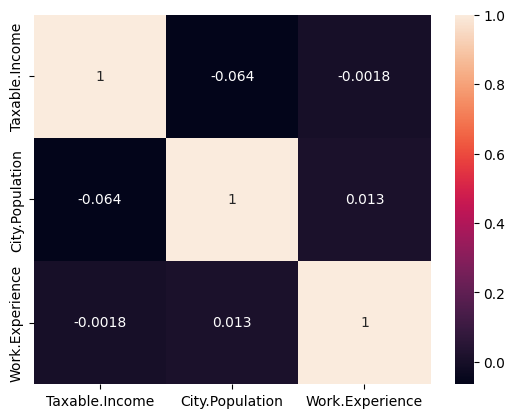

In [4]:
sns.heatmap(df.corr(), annot=True)

In [5]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

<Axes: >

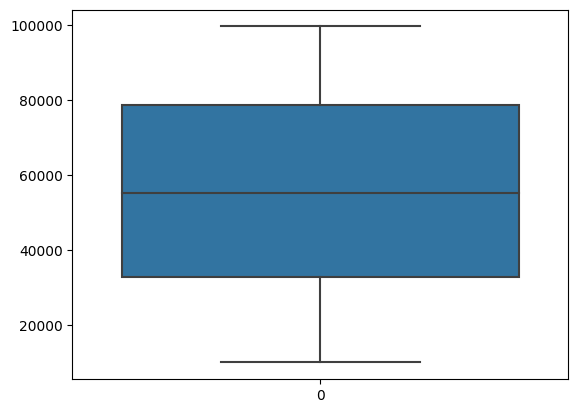

In [6]:


sns.boxplot(df['Taxable.Income'])



In [7]:


#data preprocessing
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Marital.Status']= LE.fit_transform(df['Marital.Status'])
df['Undergrad']= LE.fit_transform(df['Undergrad'])
df['Urban']= LE.fit_transform(df['Urban'])
df



,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [8]:


data=df[['Taxable.Income','City.Population','Work.Experience','Undergrad','Marital.Status','Urban']]
data.head()



,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban
0,68833,50047,10,0,2,1
1,33700,134075,18,1,0,1
2,36925,160205,30,0,1,1
3,50190,193264,15,1,2,1
4,81002,27533,28,0,1,0


In [9]:


#taxable income is <=30000 means Risky(0) otherwise Good(1)
data['Taxable.Income']=[0 if i<=30000 else 1 for i in data['Taxable.Income']]
data



,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban
0,1,50047,10,0,2,1
1,1,134075,18,1,0,1
2,1,160205,30,0,1,1
3,1,193264,15,1,2,1
4,1,27533,28,0,1,0
...,...,...,...,...,...,...
595,1,39492,7,1,0,1
596,1,55369,2,1,0,1
597,1,154058,0,0,0,1
598,1,180083,17,1,1,0


In [10]:


#remove outliers
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(data)



IsolationForest(contamination=0.01, random_state=10)

In [11]:


#predictions
y_pred_outliers = clf.predict(data)
y_pred_outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [12]:


data['Outliers']=y_pred_outliers
data



,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban,Outliers
0,1,50047,10,0,2,1,1
1,1,134075,18,1,0,1,1
2,1,160205,30,0,1,1,1
3,1,193264,15,1,2,1,1
4,1,27533,28,0,1,0,1
...,...,...,...,...,...,...,...
595,1,39492,7,1,0,1,1
596,1,55369,2,1,0,1,1
597,1,154058,0,0,0,1,1
598,1,180083,17,1,1,0,1


In [13]:


data[data.Outliers==-1]  # Number Of outliers



,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban,Outliers
16,0,34551,29,1,0,0,-1
34,0,183767,1,1,0,1,-1
126,0,195022,3,1,0,1,-1
168,0,167629,30,0,0,0,-1
280,0,33184,1,0,0,0,-1
541,0,191874,30,1,0,1,-1


In [14]:


data1= data.drop(data.index[[16,34,126,168,280,541]],axis=0).reset_index()
data1



,index,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban,Outliers
0,0,1,50047,10,0,2,1,1
1,1,1,134075,18,1,0,1,1
2,2,1,160205,30,0,1,1,1
3,3,1,193264,15,1,2,1,1
4,4,1,27533,28,0,1,0,1
...,...,...,...,...,...,...,...,...
589,595,1,39492,7,1,0,1,1
590,596,1,55369,2,1,0,1,1
591,597,1,154058,0,0,0,1,1
592,598,1,180083,17,1,1,0,1


In [15]:


#remove extra columns
data1=data1.drop(['Outliers','index'],axis=1)

data1



,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban
0,1,50047,10,0,2,1
1,1,134075,18,1,0,1
2,1,160205,30,0,1,1
3,1,193264,15,1,2,1
4,1,27533,28,0,1,0
...,...,...,...,...,...,...
589,1,39492,7,1,0,1
590,1,55369,2,1,0,1
591,1,154058,0,0,0,1
592,1,180083,17,1,1,0


<Axes: xlabel='Undergrad', ylabel='count'>

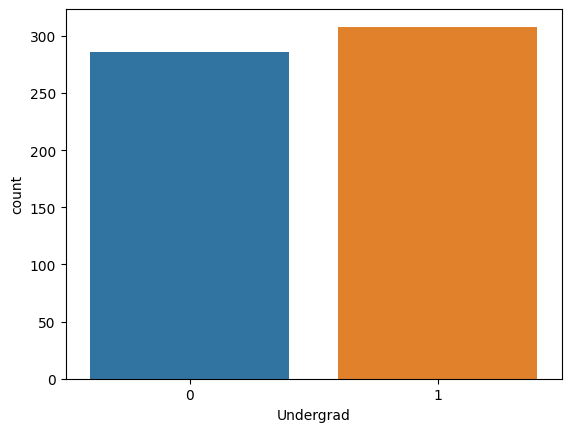

In [17]:


sns.countplot(x=data1['Undergrad'])



<Axes: xlabel='Marital.Status', ylabel='count'>

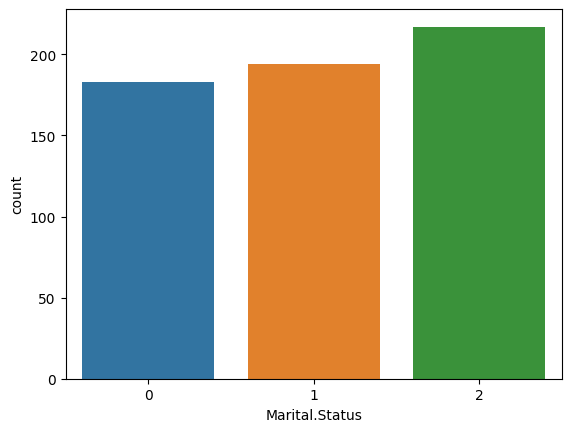

In [18]:
sns.countplot(x=data1['Marital.Status'])

<Axes: xlabel='Urban', ylabel='count'>

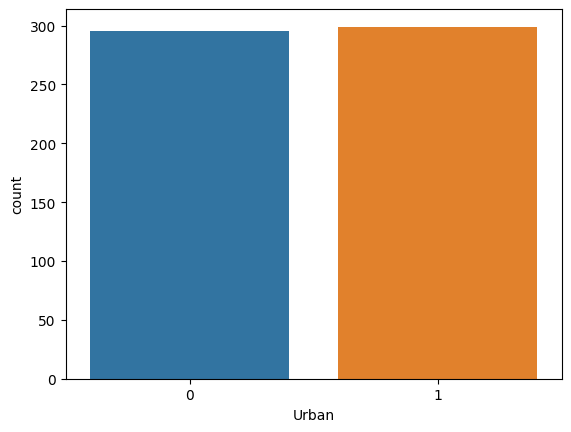

In [19]:
sns.countplot(x=data1['Urban'])

<Axes: xlabel='Taxable.Income', ylabel='count'>

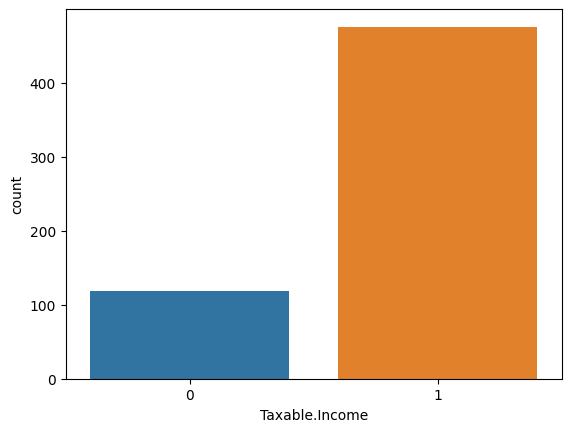

In [20]:


sns.countplot(x=data1["Taxable.Income"])



In [21]:


data1['Taxable.Income'].value_counts()



1    476
0    118
Name: Taxable.Income, dtype: int64

<Axes: xlabel='City.Population', ylabel='Density'>

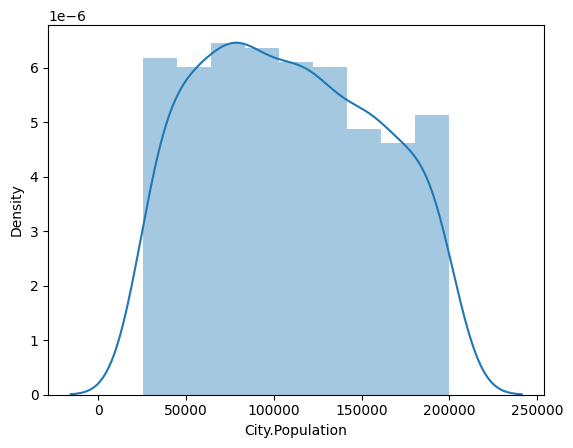

In [22]:


sns.distplot(data1['City.Population'])



<Axes: xlabel='Work.Experience', ylabel='Density'>

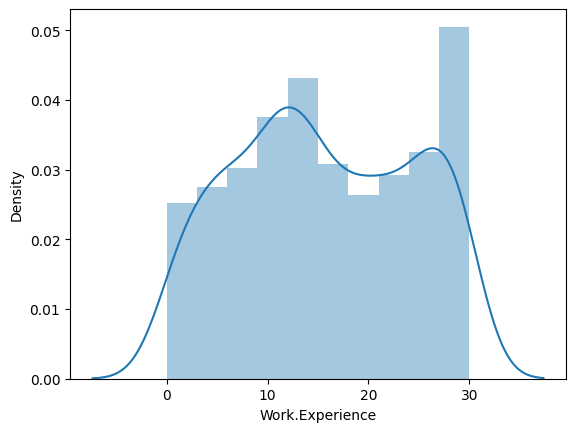

In [23]:
sns.distplot(data1['Work.Experience'])

In [24]:
#dividing data
x=data1.iloc[:,1:]
y=data1.iloc[:,0]

#standerization
from sklearn.preprocessing import MinMaxScaler
MM=MinMaxScaler()
MM_x=MM.fit_transform(x)

#split data into train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(MM_x,y,test_size=0.3,random_state=40)

x_train.shape, x_test.shape,y_train.shape,y_test.shape



((415, 5), (179, 5), (415,), (179,))

In [25]:
#by using entropy
from sklearn.ensemble import RandomForestClassifier
DT= RandomForestClassifier(criterion='entropy',max_depth=10,n_estimators=200)

DT.fit(x_train,y_train)



RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200)

In [26]:
pred=DT.predict(x_test)

from sklearn.metrics import accuracy_score,classification_report
acc=accuracy_score(y_test,pred)*100
print('Accuracy=',acc)
print(classification_report(y_test,pred))



Accuracy= 73.74301675977654
              precision    recall  f1-score   support

           0       0.17      0.02      0.04        43
           1       0.76      0.96      0.85       136

    accuracy                           0.74       179
   macro avg       0.46      0.49      0.44       179
weighted avg       0.62      0.74      0.65       179



In [27]:
#by using gini in random forest

DT= RandomForestClassifier(criterion='gini',max_depth=10,n_estimators=200)

DT.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=200)

pred=DT.predict(x_test)

from sklearn.metrics import accuracy_score,classification_report
acc=accuracy_score(y_test,pred)*100
print('Accuracy=',acc)
print(classification_report(y_test,pred))



Accuracy= 73.18435754189943
              precision    recall  f1-score   support

           0       0.14      0.02      0.04        43
           1       0.76      0.96      0.84       136

    accuracy                           0.73       179
   macro avg       0.45      0.49      0.44       179
weighted avg       0.61      0.73      0.65       179



In [29]:
#using grid search ch
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

parameters=[{'n_estimators':[100,200,300,500,800,1200], 'criterion': ['entropy', 'gini'], 'max_depth':[5,8,10,15,20,25,30]}]
classifier=RandomForestClassifier(random_state=1)
estimator=classifier
cl=GridSearchCV(estimator,parameters,cv=10)
cl.fit(MM_x,y)



GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [5, 8, 10, 15, 20, 25, 30],
                          'n_estimators': [100, 200, 300, 500, 800, 1200]}])

In [30]:


print(cl.best_score_)
print(cl.best_params_)



0.8013559322033899
{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 100}


In [31]:
#using this parameter
model1=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=5)
model1.fit(x_train,y_train)
pred1=model1.predict(x_test)
pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [32]:
ac=accuracy_score(y_test,pred1)
print("accuracy score:",ac.round(2))

accuracy score: 0.76


In [33]:
#model validation
#k-fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds =10

kfold = KFold(n_splits=num_folds, random_state=None)
model2 = RandomForestClassifier(n_estimators=100,max_depth=5,criterion='entropy',random_state =1)
results = cross_val_score(model2,MM_x,y,cv=kfold)

print(results.mean()*100.0)
print(results.std()*100)

80.15819209039549
6.594060239204076


In [34]:
#using leave one out cross validation
from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()
model_LOO = RandomForestClassifier(n_estimators=100,criterion = 'entropy',max_depth=5)
result = cross_val_score(model_LOO, MM_x,y, cv=loocv)

print(result.mean()*100.0)
print(result.std()*100)



80.13468013468014
39.898634728277536
